In [1]:
import mesa_reader as mr
from astropy.io import ascii
import numpy as np
import math

import matplotlib.pyplot as plt


In [2]:
import mesa_reader as mr
#file_out = 'ques4m1density.csv' 
l = mr.MesaLogDir('/home/ibik/ques4/LOGS')
p = l.profile_data() # replace with history?

s = mr.MesaLogDir('/home/ibik/ques4m05/LOGS')
q = s.profile_data() # replace with history?

logD1=p.logRho
logD2=q.logRho
logp1=p.logP
logp2=q.logP
logt1=p.logT
logt2=q.logT

r1=p.R
r2=q.R
y1= np.diff(logp1) / np.diff(logD1)
y2= np.diff(logp2) / np.diff(logD2)

enuc1 = p.eps_nuc
enuc2 = q.eps_nuc

logenuc = p.log_abs_eps_nuc
#y = np.diff(logp) / np.diff(logD)
z =([logD,logp,logt,logr,enuc,logenuc])
#dlogp
#print (z)

NameError: name 'logD' is not defined

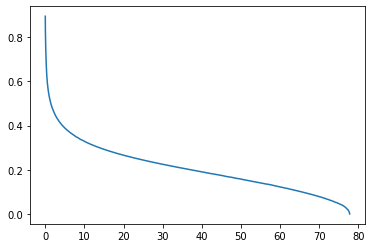

In [14]:
d = p.Rho
s = q.R
plt.plot(d,s)

#### np.transpose(z)

In [4]:
np.savetxt('ques4l100.csv',np.transpose(z), delimiter = ',')

In [17]:
y = np.diff(logp) / np.diff(logD)
#print(y)
np.savetxt('yl100.csv',y, delimiter = ',')

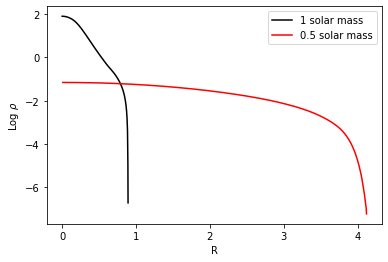

In [4]:
file1='ques4density.csv'
data1 = ascii.read(file1,format='csv')
file2='ques4m05density.csv'
data2 = ascii.read(file2,format='csv')
#logd1 = data1['logD']
#logr1 = data1['logr']

#logd2 = data2['logD']
#logr2 = data2['logr']

plt.plot(r1,logD1,'k',label = '1 solar mass')
plt.plot(r2,logD2,'r',label = '0.5 solar mass')
#plt.scatter(logTeff,logL)
plt.xlabel('R')
plt.ylabel(r'Log $\rho$')
#r'$\nu$ (GHz)', fontsize=20
plt.legend()
#plt.xlim(0.2,0.4)
#plt.ylim(0,2)
#plt.show()
plt.savefig('ques4bi.pdf')


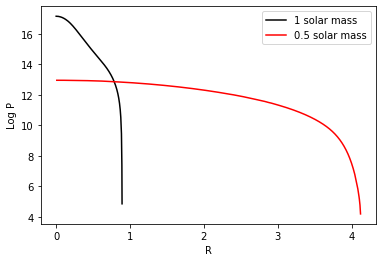

In [7]:
file1='ques4density.csv'
data1 = ascii.read(file1,format='csv')
file2='ques4m05density.csv'
data2 = ascii.read(file2,format='csv')
#logp1 = data1['logp']
#logr1 = data1['logr']

#logp2 = data2['logp']
#logr2 = data2['logr']

plt.plot(r1,logp1,'k',label = '1 solar mass')
plt.plot(r2,logp2,'r',label = '0.5 solar mass')
#plt.scatter(logTeff,logL)
plt.xlabel('R')
plt.ylabel('Log P')
plt.legend()
#plt.xlim(5.0,3.0)
#plt.ylim(-10,10)
#plt.show()
plt.savefig('ques4bii.pdf')


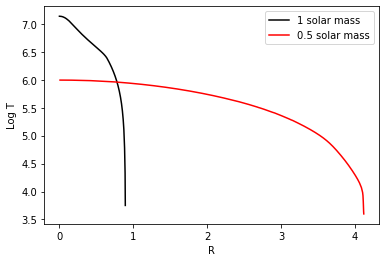

In [9]:
file1='ques4density.csv'
data1 = ascii.read(file1,format='csv')
file2='ques4m05density.csv'
data2 = ascii.read(file2,format='csv')
#logt1 = data1['logt']
#logr1 = data1['logr']

#logt2 = data2['logt']
#logr2 = data2['logr']

plt.plot(r1,logt1,'k',label = '1 solar mass')
plt.plot(r2,logt2,'r',label = '0.5 solar mass')
#plt.scatter(logTeff,logL)
plt.xlabel('R')
plt.ylabel('Log T')
plt.legend()
#plt.xlim(5.0,3.0)
#plt.ylim(-10,10)
#plt.show()
plt.savefig('ques4biii.pdf')

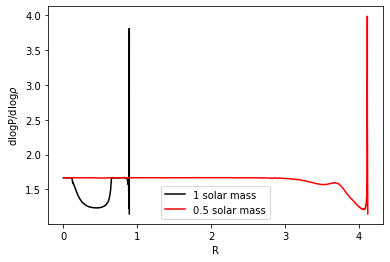

In [10]:
#dlogp/dllogd
file1='ques4density.csv'
data1 = ascii.read(file1,format='csv')
file2='ques4m05density.csv'
data2 = ascii.read(file2,format='csv')
#logy1 = data1['dlogp/dllogd']
#logr1 = data1['logr']

#logy2 = data2['dlogp/dllogd']
#logr2 = data2['logr']

plt.plot(r1[0:-1],y1,'k',label = '1 solar mass')
plt.plot(r2[0:-1],y2,'r',label = '0.5 solar mass')
#plt.scatter(logTeff,logL)
plt.xlabel('R')
plt.ylabel(r'dlogP/dlog$\rho$')
plt.legend()
#plt.xlim(5.0,3.0)
#plt.ylim(-10,10)
#plt.show()
plt.savefig('ques4biv.pdf')


/home/ibik/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in double_scalars


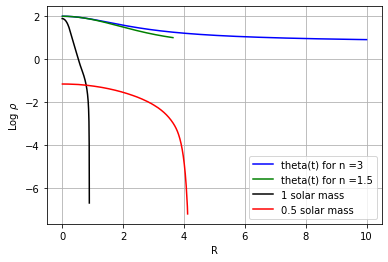

<Figure size 432x288 with 0 Axes>

In [13]:
import matplotlib.pyplot as plt
import numpy as np

from scipy.integrate import odeint
def LaneEmden1(y, t, n1):
     theta1, omega = y
     dydt = [omega, -2/t*omega - (theta1)**n1]
     return dydt
t = np.linspace(0.01,10,1000)
y0 = [1,0.01]
offset = 1
n1=3
sol1 = odeint(LaneEmden1, y0, t, args=(n1,))
theta1 = sol1[:, 0]+offset

def LaneEmden2(y, t, n1):
     theta2, omega = y
     dydt = [omega, -2/t*omega - (theta2)**n2]
     return dydt
t = np.linspace(0.01, 10,1000)
y0 = [1,0.01]

n2=1.5
sol2 = odeint(LaneEmden2, y0, t, args=(n2,))
theta2 = sol2[:, 0]+offset



d1 =logD1
d2 =logD2
ra = 10**(r1)
rb = 10**(r2)

plt.plot(t, theta1, 'b',label='theta(t) for n =3')
plt.plot(t,theta2,'g', label='theta(t) for n =1.5')

plt.grid()

plt.plot(r1,logD1,'k',label = '1 solar mass')
plt.plot(r2,logD2,'r',label = '0.5 solar mass')
#plt.scatter(logTeff,logL)
plt.xlabel('R')
plt.ylabel(r'Log $\rho$')
#r'$\nu$ (GHz)', fontsize=20
plt.legend()
#plt.xlim(1,4)
#plt.ylim(0,2)
plt.show()
plt.savefig('ques4ci.pdf')

/home/ibik/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in double_scalars


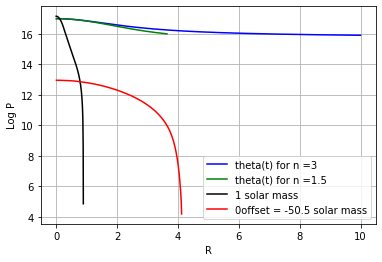

In [15]:
import matplotlib.pyplot as plt
import numpy as np

from scipy.integrate import odeint
def LaneEmden1(y, t, n1):
     theta1, omega = y
     dydt = [omega, -2/t*omega - (theta1)**n1]
     return dydt
t = np.linspace(0.01,10,10000)
y0 = [1,0.01]

offset1 = 16
offset2 = 16
n1=3
sol1 = odeint(LaneEmden1, y0, t, args=(n1,))
theta1 = sol1[:, 0]+offset1

def LaneEmden2(y, t, n1):
     theta2, omega = y
     dydt = [omega, -2/t*omega - (theta2)**n2]
     return dydt
t = np.linspace(0.01, 10,10000)
y0 = [1,0.01]
n2=1.5
sol2 = odeint(LaneEmden2, y0, t, args=(n2,))
theta2 = sol2[:, 0]+offset2


d1 =logD1
d2 =logD2
ra = 10**(r1)
rb = 10**(r2)

plt.plot(t, theta1, 'b',label='theta(t) for n =3')
plt.plot(t,theta2,'g', label='theta(t) for n =1.5')

plt.grid()
plt.plot(r1,logp1,'k',label = '1 solar mass')
plt.plot(r2,logp2,'r',label = '0offset = -50.5 solar mass')
#plt.scatter(logTeff,logL)
plt.xlabel('R')
plt.ylabel('Log P')
plt.legend()
#plt.xlim(1,4.0)
#plt.ylim(14,19)
#plt.show()
plt.savefig('ques4cii.pdf')


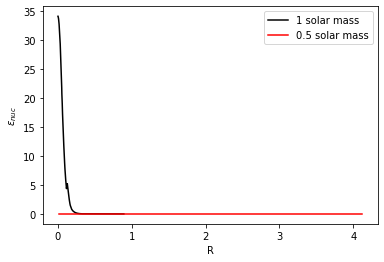

In [17]:
plt.plot(r1,enuc1,'k',label = '1 solar mass')
plt.plot(r2,enuc2,'r',label = '0.5 solar mass')
#plt.scatter(logTeff,logL)
plt.xlabel('R')
plt.ylabel(r'$\epsilon_{nuc}$')
plt.legend()
#plt.xlim(5.0,3.0)
#plt.ylim(-10,10)
#plt.show()
plt.savefig('ques4di.pdf')

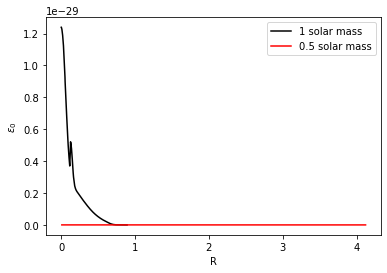

In [19]:
epsilono1 = enuc1/(10**(logD1)*(10**(logt1))**4)
epsilono2 = enuc2/(10**(logD2)*(10**(logt2))**4)
#print(epsilono1,epsilono2)
plt.plot(r1,epsilono1,'k',label = '1 solar mass')
plt.plot(r2,epsilono2,'r',label = '0.5 solar mass')
#plt.scatter(logTeff,logL)
plt.xlabel('R')
plt.ylabel(r'$\epsilon_{0}$')
plt.legend()
#plt.xlim(5.0,3.0)
#plt.ylim(-10,10)
#plt.show()
plt.savefig('ques4dii.pdf')


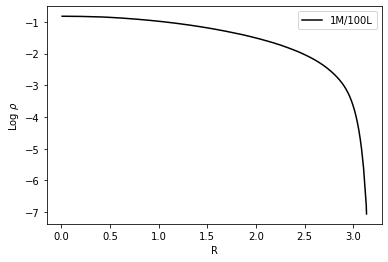

In [20]:
# for the 100 luminosity
w = mr.MesaLogDir('/home/ibik/ques4m05/LOGS')
z = w.profile_data() # replace with history?
logD=z.logRho
logp=z.logP
logt=z.logT
r=z.R
y= np.diff(logp) / np.diff(logD)

plt.plot(r,logD,'k',label = '1M/100L')
#plt.plot(r1,enuc2,'r',label = '0.5 solar mass')
#plt.scatter(logTeff,logL)
plt.xlabel('R')
plt.ylabel(r'Log $\rho$')
plt.legend()
#plt.xlim(5.0,3.0)
#plt.ylim(-10,10)
#plt.show()
plt.savefig('ques4ei.pdf')

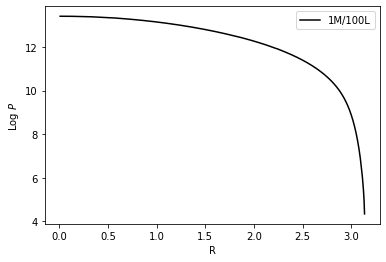

In [21]:

plt.plot(r,logp,'k',label = '1M/100L')
#plt.plot(r1,enuc2,'r',label = '0.5 solar mass')
#plt.scatter(logTeff,logL)
plt.xlabel('R')
plt.ylabel(r'Log $P$')
plt.legend()
#plt.xlim(5.0,3.0)
#plt.ylim(-10,10)
#plt.show()
plt.savefig('ques4eii.pdf')

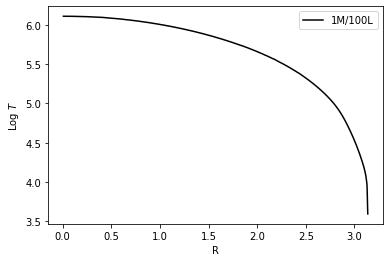

In [22]:

plt.plot(r,logt,'k',label = '1M/100L')
#plt.plot(r1,enuc2,'r',label = '0.5 solar mass')
#plt.scatter(logTeff,logL)
plt.xlabel('R')
plt.ylabel(r'Log $T$')
plt.legend()
#plt.xlim(5.0,3.0)
#plt.ylim(-10,10)
#plt.show()
plt.savefig('ques4eiii.pdf')

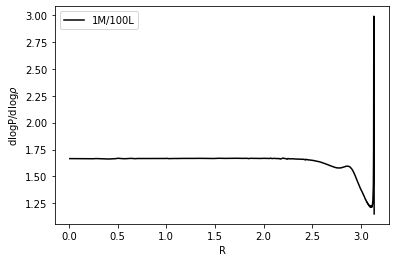

In [23]:

plt.plot(r[0:-1],y,'k',label = '1M/100L')
#plt.plot(r1,enuc2,'r',label = '0.5 solar mass')
#plt.scatter(logTeff,logL)
plt.xlabel('R')
plt.ylabel(r'dlogP/dlog$\rho$')
plt.legend()
#plt.xlim(5.0,3.0)
#plt.ylim(-10,10)
#plt.show()
plt.savefig('ques4eiv.pdf')

In [ ]:

k_nonrel = 1.0036e13/(2**(5/3))
k_rel = 1.2435e15/(2**(4/3))
rho1 =np.arange(0.01,2,0.01)
rho2 = np.arange(0.01,2,0.01)

P_nonrel = k_nonrel*rho1**(5./3.)
P_rel = k_rel*rho2**(4./3.)

